Connect google colab with dataset from kaggle ...


In [ ]:
import tensorflow as tf     ##tensorflow-gpu
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
    print('GPU device not found. Make sure you have enabled the GPU runtime.')
else:
    print('GPU device found:', device_name)

GPU device found: /device:GPU:0


In [ ]:
!pip install -q kaggle

In [ ]:
import os
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                    title                                        size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------  ------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
thedrcat/daigt-v2-train-dataset                        DAIGT V2 Train Dataset                       29MB  2023-11-16 01:38:36           2549        227  1.0              
thedevastator/global-video-game-sales-and-ratings      Global Video Game Sales and Ratings          71KB  2023-12-20 06:46:32           1347         29  0.9411765        
muhammadbinimran/housing-price-prediction-data         Housing Price Prediction Data               763KB  2023-11-21 17:56:32          11513        192  1.0              
thedevastator/netflix-imdb-scores                      Netflix IMDB Scores                         699KB  2023-12-03 14:10:34           5009     

In [ ]:
!kaggle datasets download -d gti-upm/leapgestrecog

100% 2.13G/2.13G [01:48<00:00, 22.4MB/s]
100% 2.13G/2.13G [01:48<00:00, 21.1MB/s]


In [ ]:
!unzip /content/leapgestrecog.zip

Streaming output truncated to the last 5000 lines.
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0001.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0002.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0003.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0004.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0005.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0006.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0007.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0008.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0009.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0010.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0011.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0012.png  
  inflating: leapgestrecog/leapGestRe

starting train

In [ ]:
"these are my suitable libraries "
import tensorflow as tf     ##tensorflow-gpu
import cv2                  ##opencv-python
import os
import matplotlib.pyplot as plt  ## matplotlib
import numpy as np
from google.colab.patches import cv2_imshow
import numpy as np
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
"""
this function that does pre-processing to our images ...
resized without a lossing of features to images ...
"""
import cv2
import numpy as np

def resize_with_padding(image, target_size, padding_color=(0, 0, 0)):
    try:
        height, width = image.shape[:2]
        target_height, target_width = target_size

        # Calculate the aspect ratio of the original image
        aspect_ratio = width / height

        # Calculate the target aspect ratio
        target_aspect_ratio = target_width / target_height

        # Calculate the new size with padding
        if target_aspect_ratio > aspect_ratio:
            new_width = int(target_height * aspect_ratio)
            new_height = target_height
            pad_left = (target_width - new_width) // 2
            pad_right = target_width - new_width - pad_left
            pad_top = 0
            pad_bottom = 0
        else:
            new_width = target_width
            new_height = int(target_width / aspect_ratio)
            pad_left = 0
            pad_right = 0
            pad_top = (target_height - new_height) // 2
            pad_bottom = target_height - new_height - pad_top

        # Resize the image while maintaining the aspect ratio
        resized_image = cv2.resize(image, (new_width, new_height))

        # Create a new image with the target size and fill it with padding color
        padded_image = np.full((target_height, target_width, 3), padding_color, dtype=np.uint8)
        padded_image[pad_top:pad_top+new_height, pad_left:pad_left+new_width] = resized_image

        return padded_image

    except Exception as e:
        print("An error occurred during image resizing:", str(e))
        return None


.........1_Step...............


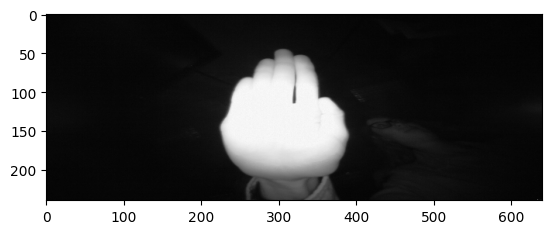

.........2_Step...............
Resize_image


<function matplotlib.pyplot.show(close=None, block=None)>

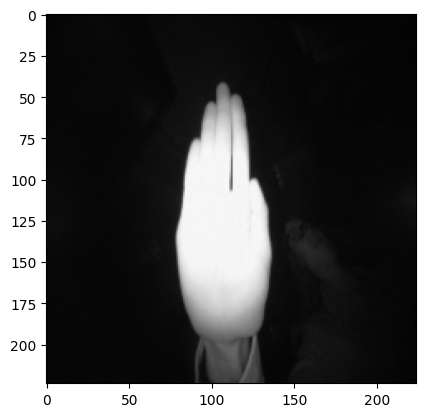

In [ ]:
"""
This chapter is responsible for reading images within the classes we want to predict,
 and performing preprocessing on the images by converting them into arrays for training.
"""

train_data=r'/content/leapGestRecog/00'
# Classes =["00" , "01" , "02"]  ##list of classes
Classes_sub = ["01_palm" , "02_l" , "03_fist" , "04_fist_moved" , "05_thumb"
               ,"06_index" , "07_ok" , "08_palm_moved","09_c" , "10_down"
              ]
print(".........1_Step...............")
for category in Classes_sub :
    path=os.path.join(train_data,category)
    for img in os.listdir(path):
          img_array=cv2.imread(os.path.join(path,img))
          backtorgb = cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB)
          plt.imshow(cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB))
          plt.show()
          break
    break
print(".........2_Step...............")
print("Resize_image")
img_size= 224 # ImageNet=>224*224
new_array=cv2.resize(img_array,(img_size,img_size))
plt.imshow(cv2.cvtColor(new_array,cv2.COLOR_BGR2RGB))
plt.show

In [ ]:
print(".........3_Step...............")
print("read all the images and convertin them to array")
training_Data =[]  ## data
def create_training_Data():
      for category in Classes_sub:
          path=os.path.join(train_data,category)
          class_num= Classes_sub.index(category)   ## 0 1 ##lable
          for img in os.listdir(path):
              try:
                  img_array=cv2.imread(os.path.join(path,img))
                  new_array=cv2.resize(img_array,(img_size,img_size))
                  training_Data.append([new_array,class_num])
              except Exception as e:
                  pass
print("training_Data")
create_training_Data()
print(len(training_Data))

.........3_Step...............
read all the images and convertin them to array
training_Data
2000


In [ ]:
print(".........3_Step...............")
temp=np.array(training_Data)
temp.shape
import random
random.shuffle(training_Data)
X=[]   ##data/feature
Y=[]   ## label
for features,label in training_Data:
    X.append(features)
    Y.append(label)
print("converting it to 4 dimenstion")
X=np.array(X).reshape(-1,img_size,img_size,3)  ## converting it to 4 dimenstion
X.shape   ##output: (un data ,224,224,3)

.........3_Step...............
converting it to 4 dimenstion


<ipython-input-15-f795a976e93c>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  temp=np.array(training_Data)


(2000, 224, 224, 3)

In [ ]:
print(".........4_Step...............")
print("normalize the data")
X=X/255.0;  #we ara normalizrd it
Y=np.array(Y)
Y.shape
X.shape

.........4_Step...............
normalize the data


(2000, 224, 224, 3)

In [ ]:
"""
split my dataset to train and test ...
"""

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=12)
print(X_train.shape)

(1600, 224, 224, 3)


In [ ]:
print(".........1_Step...............")
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.applications import ResNet50
print(".........2_Step...............")
print("per-trained Model")
model= tf.keras.applications.EfficientNetV2B0()
print(".........3_Step...............")
print("Transfer Learning -Tuning ,weights will start from last check point")
base_input = model.layers[0].input
base_output=model.layers[-2].output
base_input
base_output


.........1_Step...............
.........2_Step...............
per-trained Model
29403144/29403144 [==============================] - 2s 0us/step
.........3_Step...............
Transfer Learning -Tuning ,weights will start from last check point


<KerasTensor: shape=(None, 1280) dtype=float32 (created by layer 'top_dropout')>

In [ ]:
print(".........4_Step...............")
print("New_model")
final_output=layers.Dense(128)(base_output)   ##adding new layer , after the output  of global pooling layer
#final_output=layers.Dropout(0.4)(final_output)
final_output=layers.Activation ('relu')(final_output)  ##activation function
final_output=layers.Dense(64)(final_output)
#final_output=layers.Dropout(0.4)(final_output)
final_output=layers.Activation('relu')(final_output)
final_output=layers.Dense(10,activation='softmax')(final_output)  ## my classes are 07
final_output

.........4_Step...............
New_model


<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dense_2')>

In [ ]:
print(".........5_Step...............")
new_model = keras.Model(inputs=base_input ,outputs=final_output)
new_model.summary()


.........5_Step...............
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, 224, 224, 3)          0         ['input_1[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, 224, 224, 3)          0         ['rescaling[0][0]']           
 on)                                                                                              
                                                                                                  
 stem_conv (Conv2D)          (None, 112, 112, 32)         864  

In [ ]:
print(".........7_Step...............")
new_model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",run_eagerly=True,metrics= ["accuracy"])

.........7_Step...............


In [ ]:
import time
start_time= time.time()
history=new_model.fit(X_train,y_train,epochs=20)
ent_time=time.time()

Epoch 1/20


50/50 [==============================] - 98s 1s/step - loss: 0.3328 - accuracy: 0.9169
Epoch 2/20
50/50 [==============================] - 50s 1s/step - loss: 0.1035 - accuracy: 0.9806
Epoch 3/20
50/50 [==============================] - 37s 734ms/step - loss: 0.0532 - accuracy: 0.9869
Epoch 4/20
50/50 [==============================] - 39s 785ms/step - loss: 0.0200 - accuracy: 0.9937
Epoch 5/20
50/50 [==============================] - 36s 723ms/step - loss: 0.0297 - accuracy: 0.9931
Epoch 6/20
50/50 [==============================] - 36s 725ms/step - loss: 0.0389 - accuracy: 0.9906
Epoch 7/20
50/50 [==============================] - 38s 761ms/step - loss: 0.0477 - accuracy: 0.9906
Epoch 8/20
50/50 [==============================] - 36s 729ms/step - loss: 0.0427 - accuracy: 0.9875
Epoch 9/20
50/50 [==============================] - 37s 744ms/step - loss: 0.0202 - accuracy: 0.9937
Epoch 10/20
50/50 [==============================] - 39s 785ms/step - loss: 0.0924 - accuracy: 0.9844
Epoch 

In [ ]:
new_model.save('model_res04.h5')
new_model=tf.keras.models.load_model('model_res04.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
loss, accuracy=new_model.evaluate(X_test,y_test)
print("accuracy=",accuracy)

13/13 [==============================] - 5s 144ms/step - loss: 2.6617e-04 - accuracy: 1.0000
accuracy= 1.0


In [ ]:
loss, accuracy=new_model.evaluate(X,Y)
print("accuracy=",accuracy)

NameError: ignored

In [ ]:
SIZE=256
new_model=tf.keras.models.load_model('/content/model_res04.h5')

.........8_Step...............
list all data in history
.........9_Step...............
dict_keys(['loss', 'accuracy'])


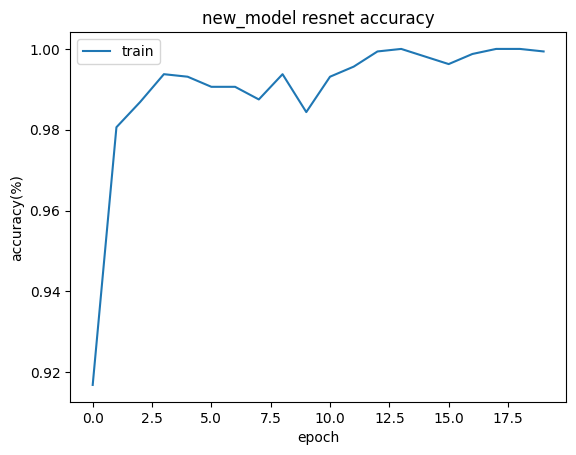

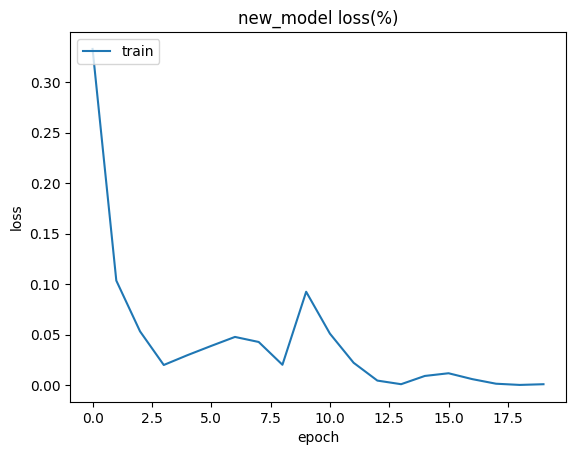

In [ ]:
print(".........8_Step...............")
print("list all data in history")
import matplotlib.pyplot as plt
from tensorflow.python.lib.io import file_io
%matplotlib inline
import keras
from keras import backend as K
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import plot_model
from sklearn.metrics import *
import skimage
from skimage.transform import rescale, resize
import pydot
print(".........9_Step...............")
# list all data in history",
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_acc'])
plt.title('new_model resnet accuracy')
plt.ylabel('accuracy(%)')
plt.xlabel('epoch')
plt.legend(['train', 'dev'], loc='upper left')
plt.show()
 #summarize history for loss
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('new_model loss(%)')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'dev'], loc='upper left')
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications.efficientnet import EfficientNetB0, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
# Load and preprocess the image
img_path = '/content/leapGestRecog/01/01_palm/frame_01_01_0001.png'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = preprocess_input(x)
x = tf.expand_dims(x, axis=0)

# Perform image prediction
new_x = resize_with_padding(x, (256, 256), padding_color=(255, 255, 255))  # Resize the image with padding and set padding color to white
new_x = preprocess_input(new_x)
new_x = tf.expand_dims(x, axis=0)
preds = new_model.predict(x)
print(preds)

An error occurred during image resizing: OpenCV(4.8.0) :-1: error: (-5:Bad argument) in function 'resize'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'

1/1 [==============================] - 4s 4s/step
[[2.4609992e-09 2.0594529e-03 7.1990776e-01 2.5087368e-01 2.7157532e-02
  4.6548512e-09 7.0030364e-07 3.6074180e-10 1.6219269e-10 8.7905971e-07]]


<ipython-input-28-edcdd667534c>:18: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  y_pred = new_model.predict_generator(X_test).argmax(axis=1)


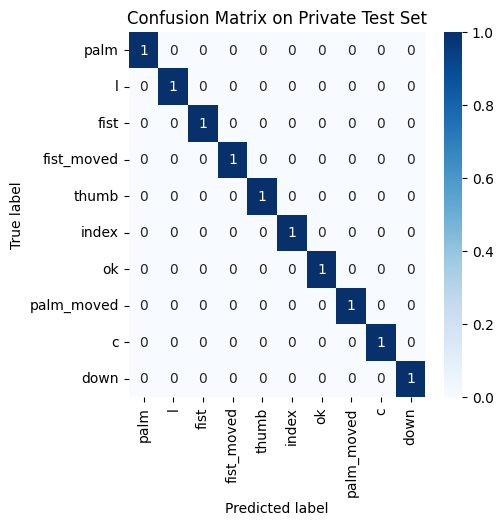

 Finding Accuracy, precision and recall
Accuracy   : 1.0
Precision : 1.0
Recall    : 1.0
F1-score  : 1.0


In [ ]:
#print(".........10_Step...............")
#print(".........Test dataset ...............")
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow.python.lib.io import file_io

import keras
from keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import confusion_matrix
from seaborn import heatmap

Guasted_hand = {0:'palm', 1:'l', 2:'fist', 3:'fist_moved', 4:'thumb', 5:'index', 6:'ok' , 7:'palm_moved' ,8:'c',9:'down' }

y_pred = new_model.predict_generator(X_test).argmax(axis=1)
y_true = y_test

cmat_df_test=pd.DataFrame(
  confusion_matrix(y_true, y_pred, normalize='true').round(2),
  index=Guasted_hand.values(),
  columns=Guasted_hand.values()
  )
plt.figure(figsize=(5,5))
heatmap(cmat_df_test,annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.title('Confusion Matrix on Private Test Set')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
print(" Finding Accuracy, precision and recall")
# Finding precision and recall
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy   :", accuracy)
precision = precision_score(y_test, y_pred,average="weighted")
print("Precision :", precision)
recall = recall_score(y_test, y_pred,average="weighted")
print("Recall    :", recall)
F1_score = f1_score(y_test, y_pred,average="weighted")
print("F1-score  :", F1_score)

.........12_Step...............
1/1 [==============================] - 0s 45ms/step
The prediction for this image is:  l
The prediction for this image is:  [4.8624294e-13 3.4888460e-11 1.4876503e-11 1.4453362e-14 3.1499626e-11
 2.7619645e-10 1.0000000e+00 4.3685854e-12 1.6941291e-14 1.6409982e-10]
The actual label for this image is:  6


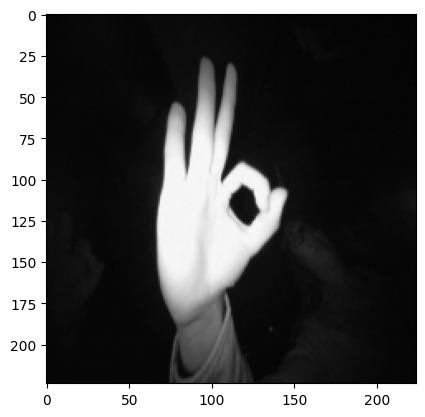

In [60]:
from sklearn.preprocessing import LabelEncoder
print(".........12_Step...............")
#Check results on a few select images
n=np.random.randint(0, X_test.shape[0])
img = X_test[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
input_img = np.reshape(input_img, (224, 224, 3))
input_img = np.expand_dims(input_img, axis=0)
input_img_feature=new_model.predict(input_img)
input_img_features=input_img_feature.reshape(input_img_feature.shape[0], -1)
prediction = new_model.predict(input_img)[0]
le = LabelEncoder()
# prediction = le.inverse_transform([prediction])  #Reverse the label encoder to original name
print("The prediction for this image is: ", prediction)
print("The actual label for this image is: ", y_test[n])
"""
note : Upon verification, we found that the image belongs to the set of images from the class we previously classified
"""